In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
from scipy.optimize import curve_fit
import pandas as pd
from distfit import distfit
from scipy.stats import skewnorm
from scipy.stats import norm
from scipy.stats import lognorm

In [71]:
# import list of best-performing flares
filename = '/Users/coletamburri/Desktop/Impulsiveness_Paper/imp_dev/all_and_best_Sep_2023.mat'
dat = sio.loadmat(filename)

In [150]:
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

In [78]:
all_imp = dat['curly_Is_relative']
best_imp_arr = dat['curly_Is_relative_best']
recmax_arr = dat['recmax']
recmax = recmax_arr[:,0]
best_imp = best_imp_arr[:,0]
bestflaresname = dat['bestflaresname']


In [74]:
goes_flux = []
for i in range(len(bestflaresname)):
    
    string = bestflaresname[i][0][0]
    if string[-4] == 'B':
        pwr = 1e-7
    elif string[-4] == 'C':
        pwr = 1e-6
    elif string[-4] == 'M':
        pwr = 1e-5
    elif string[-4] == 'X':
        pwr = 1e-4
    
    mult = float(bestflaresname[i][0][0][-3:])
    
    flux = mult*pwr
    goes_flux.append(flux)
                 
                 

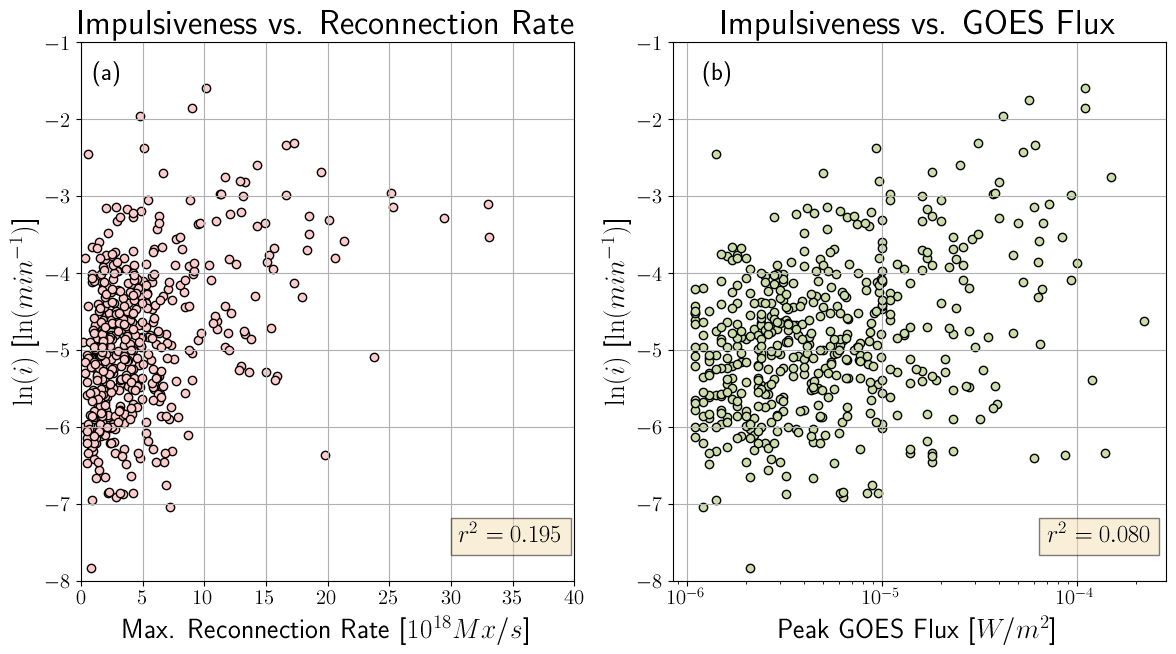

In [162]:
from matplotlib.ticker import FuncFormatter

def math_formatter(x, pos):
    return "$%s$"% int(x)

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(14,7))

ax1.scatter(recmax/1e18,best_imp,facecolor='#FFCCCC',edgecolor='black')
ax1.grid()
ax1.set_xlim([0,40])
x=list(range(0,45,5))
y=range(-8,0,1)
ax1.set_yticklabels(y,fontsize=15)
ax1.set_xticklabels(x,fontsize=15)

ax1.xaxis.set_major_formatter(FuncFormatter(math_formatter))
ax1.yaxis.set_major_formatter(FuncFormatter(math_formatter)) 

ax1.set_ylabel('$\ln(i)$ [$\ln(min^{-1})$]',fontsize=20)
ax1.set_xlabel('Max. Reconnection Rate [$10^{18} Mx/s$]',fontsize=20)
ax1.set_title('Impulsiveness vs. Reconnection Rate',fontsize=25)

props = dict(boxstyle='square', facecolor='wheat', alpha=0.5)

ax1.text(30.6,-7.5, r'$r^2 = 0.195$', fontsize=18,bbox = props)
ax1.text(1,-1.5, r'(a)', fontsize=18)

ax1.set_ylim(-8,-1)

ax2.scatter(goes_flux,best_imp,facecolor='#CCDDAA',edgecolor='black')
ax2.grid()
plt.xscale("log")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax2.set_ylabel('$\ln(i)$ [$\ln(min^{-1})$]',fontsize=20)
ax2.set_xlabel('Peak GOES Flux [$W/m^2$]',fontsize=20)
ax2.set_title('Impulsiveness vs. GOES Flux',fontsize=25)
props = dict(boxstyle='square', facecolor='wheat', alpha=0.5)

ax2.text(7e-5,-7.5, r'$r^2 = 0.080$', fontsize=18,bbox = props)
ax2.text(1.2e-6,-1.5, r'(b)', fontsize=18)

ax2.set_ylim(-8,-1)

plt.savefig('/Users/coletamburri/Desktop/imp_goes_recrate.png', dpi=300)

In [103]:
cc_imp_goes = np.corrcoef(goes_flux,best_imp)[0,1]**2
print(cc_imp_goes)

0.07961542260600547


In [104]:
cc_imp_recrate = np.corrcoef(recmax,best_imp)[0,1]**2
cc_imp_recrate

0.19478283464689983